In [1]:
import pandas as pd
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

# 1. Data Exploration and Preprocessing:
### •	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
### •	Handle missing values as per the best practices (imputation, removal, etc.).
### •	Apply scaling techniques to numerical features:
           •	Standard Scaling
           •	Min-Max Scaling
### •	Discuss the scenarios where each scaling technique is preferred and why.


In [2]:
df = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\EDA2\EDA2\adult_with_headers.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Identify numerical columns
numerical_df = df.select_dtypes(include=['number'])

#### Standard Scaling

In [8]:
# Apply Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(numerical_df)
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=numerical_df.columns)
print("\nStandard Scaled Data:\n" , df_standard_scaled)


Standard Scaled Data:
             age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030671 -1.063611       1.134739      0.148453      -0.21666   
1      0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2     -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3      1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4     -0.775768  1.408176       1.134739     -0.145920      -0.21666   
...         ...       ...            ...           ...           ...   
32556 -0.849080  0.639741       0.746039     -0.145920      -0.21666   
32557  0.103983 -0.335433      -0.420060     -0.145920      -0.21666   
32558  1.423610 -0.358777      -0.420060     -0.145920      -0.21666   
32559 -1.215643  0.110960      -0.420060     -0.145920      -0.21666   
32560  0.983734  0.929893      -0.420060      1.888424      -0.21666   

       hours_per_week  
0           -0.035429  
1           -2.222153  
2           -0.035429  
3           -0.

#### Min-Max Scaling

In [9]:
# Apply Min-Max Scaling
scaler_min_max = MinMaxScaler()
df_min_max_scaled = scaler_min_max.fit_transform(numerical_df)
df_min_max_scaled = pd.DataFrame(df_min_max_scaled, columns=numerical_df.columns)
print("\nMin-Max Scaled Data:\n", df_min_max_scaled)


Min-Max Scaled Data:
             age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.166404       0.733333      0.000000           0.0   
32557  0.315068  0.096500       0.533333      0.000000           0.0   
32558  0.561644  0.094827       0.533333      0.000000           0.0   
32559  0.068493  0.128499       0.533333      0.000000           0.0   
32560  0.479452  0.187203       0.533333      0.150242           0.0   

       hours_per_week  
0            0.397959  
1            0.122449  
2            0.397959  
3            0.3

#### Discuss the scenarios where each scaling technique is preferred and why

In [10]:
""" 1. Standard Scaling:
       Assumes Gaussian Distribution: Standard scaling is preferred when the data follows a Gaussian (normal) distribution. 
       Since it centers the data around 0 and scales it to unit variance, it makes algorithms that assume normally distributed 
       data (e.g., linear regression, logistic regression, and many clustering algorithms) perform better.

    2. Min-Max Scaling:
       Non-Gaussian Distributions: Min-Max scaling is ideal when the data does not follow a normal distribution and when the 
       data is uniformly distributed or has outliers. It scales the features to a specific range, making it useful for algorithms 
       that do not assume any particular distribution. """

' 1. Standard Scaling:\n       Assumes Gaussian Distribution: Standard scaling is preferred when the data follows a Gaussian (normal) distribution. \n       Since it centers the data around 0 and scales it to unit variance, it makes algorithms that assume normally distributed \n       data (e.g., linear regression, logistic regression, and many clustering algorithms) perform better.\n\n    2. Min-Max Scaling:\n       Non-Gaussian Distributions: Min-Max scaling is ideal when the data does not follow a normal distribution and when the \n       data is uniformly distributed or has outliers. It scales the features to a specific range, making it useful for algorithms \n       that do not assume any particular distribution. '

# 2. Encoding Techniques:
### •	Apply One-Hot Encoding to categorical variables with less than 5 categories.
### •	Use Label Encoding for categorical variables with more than 5 categories.
### •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [11]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_encoded = df.copy()

In [12]:
# Apply One-Hot Encoding for columns with < 5 categories
for col in categorical_columns:
    if df[col].nunique() < 5:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)


In [13]:
# Apply Label Encoding for columns with >= 5 categories
for col in categorical_columns:
    if df[col].nunique() >= 5:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


In [14]:
# Display the first few rows of the encoded DataFrame
df_encoded_head = df_encoded.head(10)
df_encoded_head

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0
5,37,4,284582,12,14,2,4,5,4,0,0,40,39,0,0
6,49,4,160187,6,5,3,8,1,2,0,0,16,23,0,0
7,52,6,209642,11,9,2,4,0,4,0,0,45,39,1,1
8,31,4,45781,12,14,4,10,1,4,14084,0,50,39,0,1
9,42,4,159449,9,13,2,4,0,4,5178,0,40,39,1,1


# 3. Feature Engineering:
### •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
### •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [15]:
# Feature 1: Difference between capital_gain and capital_loss
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

# Feature 2: Categorization of hours_per_week
bins = [0, 20, 40, 60, np.inf]
labels = ['part-time', 'full-time', 'over-time', 'extreme']
df_encoded['hours_per_week_category'] = pd.cut(df_encoded['hours_per_week'], bins=bins, labels=labels)

# Applying One-Hot Encoding to the new categorical feature hours_per_week_category
df_encoded = pd.get_dummies(df_encoded, columns=['hours_per_week_category'], drop_first=True)


In [16]:
""" Feature 1:
              The difference between 'capital_gain' and 'capital_loss' could provide insight into an individual's net capital 
              gains or losses, which may correlate with income level.

    Feature 2:
              Categorizing 'hours_per_week' into different groups (part-time, full-time, over-time) could help the model 
              capture patterns related to work hours without being overly sensitive to small differences in hours worked. """

" Feature 1:\n              The difference between 'capital_gain' and 'capital_loss' could provide insight into an individual's net capital \n              gains or losses, which may correlate with income level.\n\n    Feature 2:\n              Categorizing 'hours_per_week' into different groups (part-time, full-time, over-time) could help the model \n              capture patterns related to work hours without being overly sensitive to small differences in hours worked. "

In [17]:
# 2. Applying the log transformation to the skewed numerical feature 'capital_gain'
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

# the first few rows of the DataFrame to check the new features
df_encoded_head_with_new_features = df_encoded.head()
df_encoded_head_with_new_features

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_diff,hours_per_week_category_full-time,hours_per_week_category_over-time,hours_per_week_category_extreme,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,2174,1,0,0,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0,0,0,0,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,0,1,0,0,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0,1,0,0,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,0,1,0,0,0.000000


In [18]:
""" Transformation:
    The capital_gain feature is likely to be right-skewed, as most people have low or zero capital gains, with a few 
    having very high values. Applying a log transformation will reduce the impact of extreme values, making the distribution 
    more normal and helping the model to better learn from this feature. """

' Transformation:\n    The capital_gain feature is likely to be right-skewed, as most people have low or zero capital gains, with a few \n    having very high values. Applying a log transformation will reduce the impact of extreme values, making the distribution \n    more normal and helping the model to better learn from this feature. '

# 4. Feature Selection:
### •	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
### •	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings 
### with the correlation matrix.


In [19]:
# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
df_encoded['outlier'] = iso_forest.fit_predict(df_encoded)

# Filter the data to remove outliers
df_no_outliers = df_encoded[df_encoded['outlier'] == 1].drop(columns=['outlier'])

df_no_outliers.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_diff,hours_per_week_category_full-time,hours_per_week_category_over-time,hours_per_week_category_extreme,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,2174,1,0,0,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0,0,0,0,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,0,1,0,0,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0,1,0,0,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,0,1,0,0,0.000000
5,37,4,284582,12,14,2,4,5,4,0,0,40,39,0,0,0,1,0,0,0.000000
6,49,4,160187,6,5,3,8,1,2,0,0,16,23,0,0,0,0,0,0,0.000000
7,52,6,209642,11,9,2,4,0,4,0,0,45,39,1,1,0,0,1,0,0.000000
9,42,4,159449,9,13,2,4,0,4,5178,0,40,39,1,1,5178,1,0,0,8.552367
10,37,4,280464,15,10,2,4,0,2,0,0,80,39,1,1,0,0,0,1,0.000000


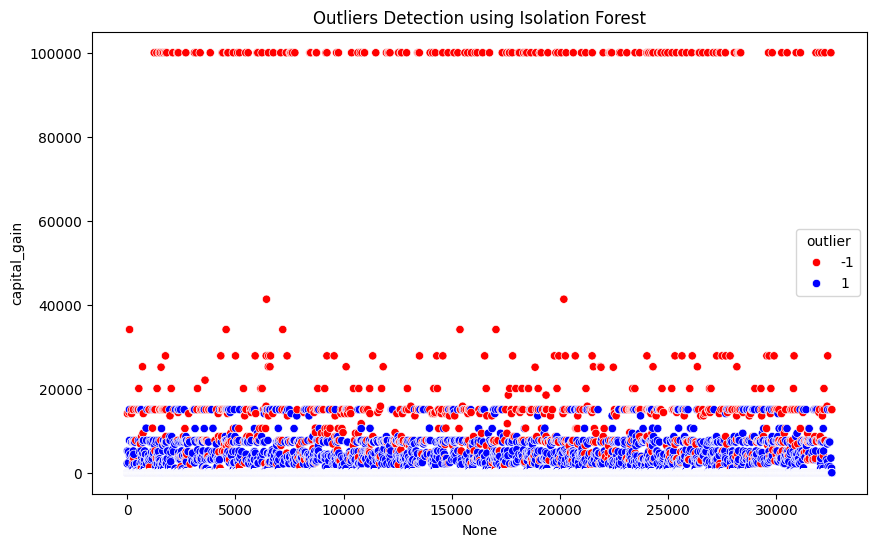

In [20]:
# Plotting the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['capital_gain'], hue=df_encoded['outlier'], palette={1: 'blue', -1: 'red'})
plt.title('Outliers Detection using Isolation Forest')
plt.show()

In [21]:
""" Effect of Outliers on Model Performance:

    Outliers can significantly skew the results of many models, especially those sensitive to distances, like KNN and clustering 
    algorithms. They can also lead to overfitting in models like linear regression, where extreme values might disproportionately 
    affect the model's parameters."""

" Effect of Outliers on Model Performance:\n\n    Outliers can significantly skew the results of many models, especially those sensitive to distances, like KNN and clustering \n    algorithms. They can also lead to overfitting in models like linear regression, where extreme values might disproportionately \n    affect the model's parameters."

In [22]:
# PPS matrix
pps_matrix = pps.matrix(df_no_outliers)
pps_matrix_filtered = pps_matrix[(pps_matrix['x'] != pps_matrix['y'])]  # Remove self-predictive results

pps_matrix_filtered[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10)

,x,y,ppscore
236,hours_per_week,hours_per_week_category_full-time,1.000000
64,education,education_num,1.000000
83,education_num,education,1.000000
237,hours_per_week,hours_per_week_category_over-time,0.999195
309,capital_diff,capital_gain,0.997876
389,capital_gain_log,capital_gain,0.997772
199,capital_gain,capital_gain_log,0.997613
319,capital_diff,capital_gain_log,0.997613
310,capital_diff,capital_loss,0.997408
238,hours_per_week,hours_per_week_category_extreme,0.993151


In [23]:
# the correlation matrix
correlation_matrix = df_no_outliers.corr()

# display the top correlations
correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)


age             age                                  1.000000
capital_gain    capital_diff                         0.979052
                capital_gain_log                     0.869324
capital_diff    capital_gain_log                     0.853683
hours_per_week  hours_per_week_category_over-time    0.509389
                hours_per_week_category_extreme      0.478874
education_num   education                            0.351475
income_ >50K    education_num                        0.308047
capital_gain    income_ >50K                         0.251101
workclass       occupation                           0.243909
dtype: float64

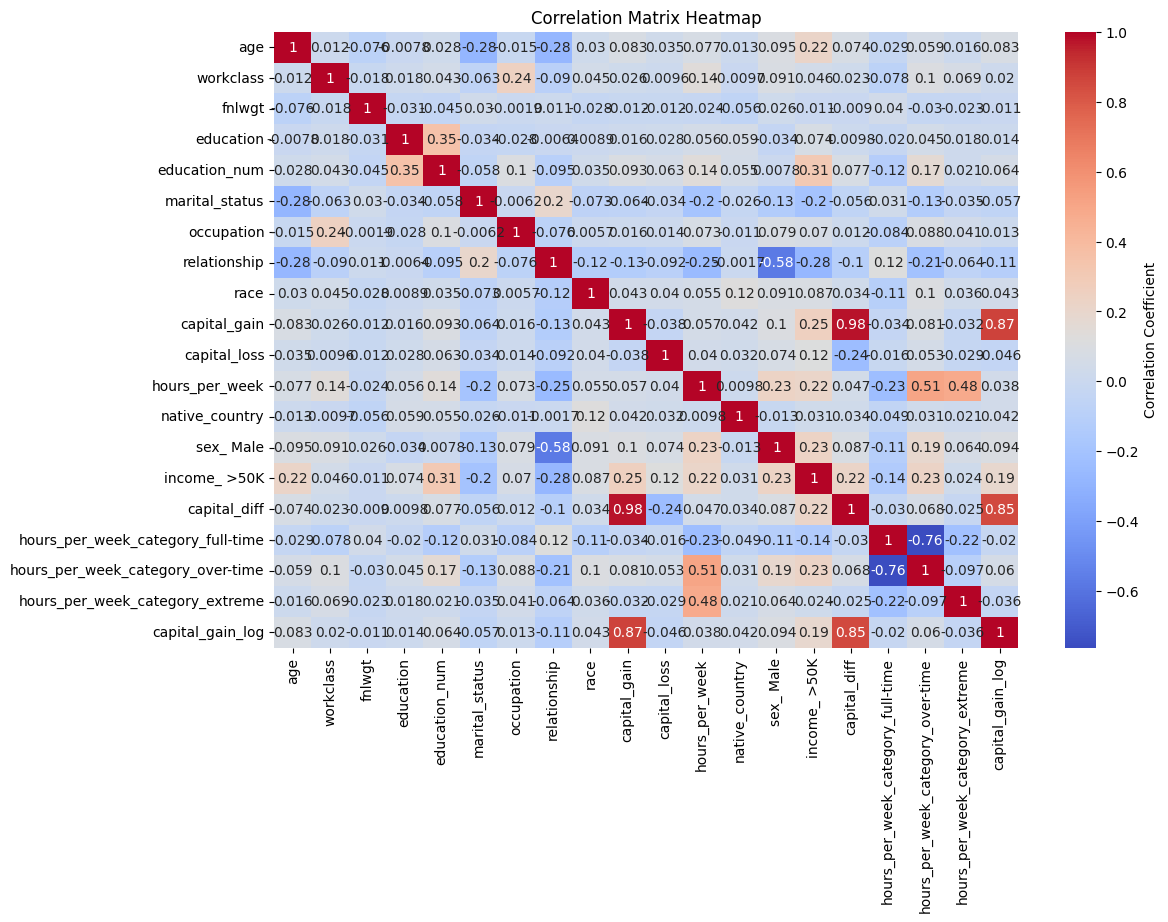

In [24]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
""" PPS vs. Correlation:

Correlation           : Captures only linear relationships. Two features with a strong non-linear relationship might have a low 
                        correlation coefficient.
             
Predictive Power Score: Captures both linear and non-linear relationships, providing a more comprehensive view of feature interactions. """

' PPS vs. Correlation:\n\nCorrelation           : Captures only linear relationships. Two features with a strong non-linear relationship might have a low \n                        correlation coefficient.\n             \nPredictive Power Score: Captures both linear and non-linear relationships, providing a more comprehensive view of feature interactions. '